In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 41726343.34it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32783678.98it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 19007482.17it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6610176.53it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_data.targets.shape

torch.Size([60000])

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
loaders = {

    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1),


    'test' : DataLoader(test_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1)

 }                        


In [9]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)


    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)
        



In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0}%)]\t{loss.item():.6f}')


def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [11]:
for epoch in range(1, 10):
    train(epoch)
    test()


/var/folders/xc/5qc2dsm12rl4s8_3vyxlnj4c0000gn/T/ipykernel_67289/3118681616.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0e+00%)]	2.303132
Train Epoch: 1 [2000/60000 (3e+00%)]	2.277637
Train Epoch: 1 [4000/60000 (7e+00%)]	2.144990
Train Epoch: 1 [6000/60000 (1e+01%)]	1.993384
Train Epoch: 1 [8000/60000 (1e+01%)]	1.985019
Train Epoch: 1 [10000/60000 (2e+01%)]	1.826663
Train Epoch: 1 [12000/60000 (2e+01%)]	1.764230
Train Epoch: 1 [14000/60000 (2e+01%)]	1.728637
Train Epoch: 1 [16000/60000 (3e+01%)]	1.703920
Train Epoch: 1 [18000/60000 (3e+01%)]	1.720367
Train Epoch: 1 [20000/60000 (3e+01%)]	1.804865
Train Epoch: 1 [22000/60000 (4e+01%)]	1.640542
Train Epoch: 1 [24000/60000 (4e+01%)]	1.699374
Train Epoch: 1 [26000/60000 (4e+01%)]	1.640202
Train Epoch: 1 [28000/60000 (5e+01%)]	1.640364
Train Epoch: 1 [30000/60000 (5e+01%)]	1.697037
Train Epoch: 1 [32000/60000 (5e+01%)]	1.603266
Train Epoch: 1 [34000/60000 (6e+01%)]	1.614841
Train Epoch: 1 [36000/60000 (6e+01%)]	1.575346
Train Epoch: 1 [38000/60000 (6e+01%)]	1.643164
Train Epoch: 1 [40000/60000 (7e+01%)]	1.652717
Train Epoch: 1 [42000

In [274]:
device

device(type='cpu')

In [89]:
def make_prediction(X):
    logit = model(X).argmax(dim=1)
    return logit

In [90]:
X, y = train_data[0]

In [93]:
make_prediction(X)

/var/folders/xc/5qc2dsm12rl4s8_3vyxlnj4c0000gn/T/ipykernel_67289/3118681616.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


tensor([5])

In [114]:
from torch.utils.data import dataset
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt

data_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize(size=(28,28)),
    transforms.ToTensor()
])

img = Image.open('/Users/navalmor/Desktop/Image Recognition/two.jpeg')
transformed_img = data_transform(img)
transformed_img.shape

torch.Size([1, 28, 28])

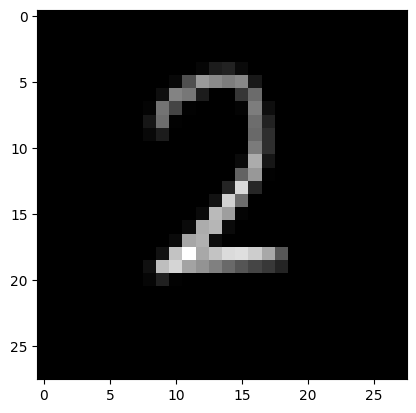

In [116]:
plt.imshow(transformed_img.permute(1,2,0), cmap='gray')

In [117]:
make_prediction(transformed_img)

/opt/homebrew/lib/python3.10/site-packages/torch/nn/functional.py:1352: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "
/var/folders/xc/5qc2dsm12rl4s8_3vyxlnj4c0000gn/T/ipykernel_67289/3118681616.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


tensor([2])

In [121]:
class ImagePredictionModel():
    def __init__(self, image_path):
        self.image_path = image_path
        self.img = Image.open(self.image_path)
        self.tensor = data_transform(self.img)

    def img_show(self):
        return self.img
    
    def show_prediction(self):
        return make_prediction(self.tensor)

In [127]:
a = ImagePredictionModel('/Users/navalmor/Desktop/one.jpeg')

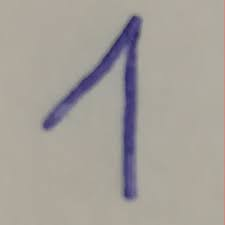

In [128]:
a.img_show()

In [130]:
a.show_prediction().item()

/opt/homebrew/lib/python3.10/site-packages/torch/nn/functional.py:1352: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "
/var/folders/xc/5qc2dsm12rl4s8_3vyxlnj4c0000gn/T/ipykernel_67289/3118681616.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


1